In [45]:
%matplotlib inline
from __future__ import print_function

from matplotlib import pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

%load_ext autoreload
%autoreload 2

from utils.data_utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Iterators

In [46]:
config = {}
config['processing'] = 'benchmark'
config['name'] = 'micro'
config['feats'] = ['percip_mm', 'humidity', 'temp', 'leafwet450_min',
                 'leafwet460_min', 'leafwet_lwscnt', 'gusts_ms', 'wind_dir', 'wind_ms']

# Load the iterator
# Initialize the batchiterator
nb_features, batch_ite_train, batch_ite_val, batch_ite_pred = load_data(
    name=config['name'], feats=config['feats'], processing=config['processing'])

Le train is composed by 24 group and 4314 observation
Le val is composed by 7 group and 920 observation
Le test is composed by 3 group and 564 observation


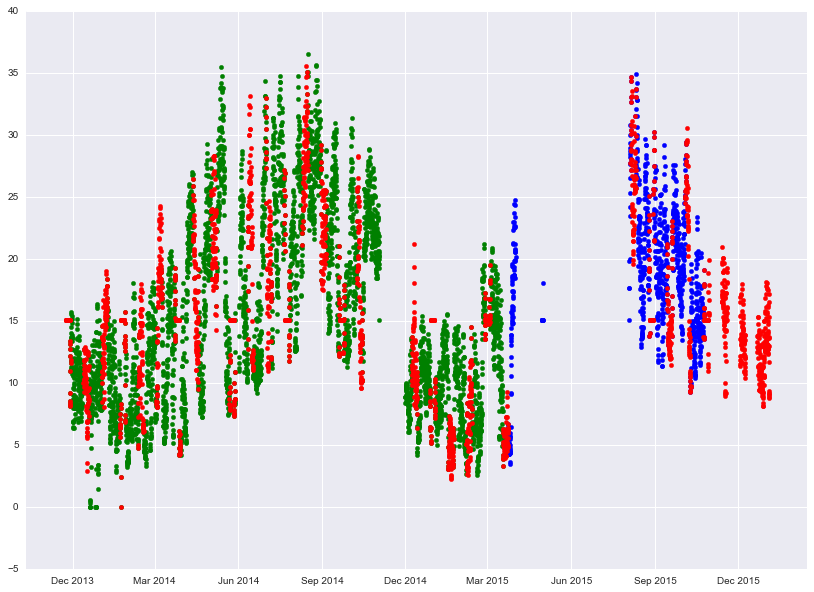

In [47]:
fig = plt.figure(figsize = (14,10))
i= 0
for key,gp in batch_ite_train.df.groupby('group'):
    plt.scatter(gp.index,gp.temp,color = 'g')
    i+=1
for key,gp in batch_ite_val.df.groupby('group'):
    plt.scatter(gp.index,gp.temp,color = 'b')
    i+=1
for key,gp in batch_ite_pred.df.groupby('group'):
    plt.scatter(gp.index,gp.temp,color = 'r')
    i+=1

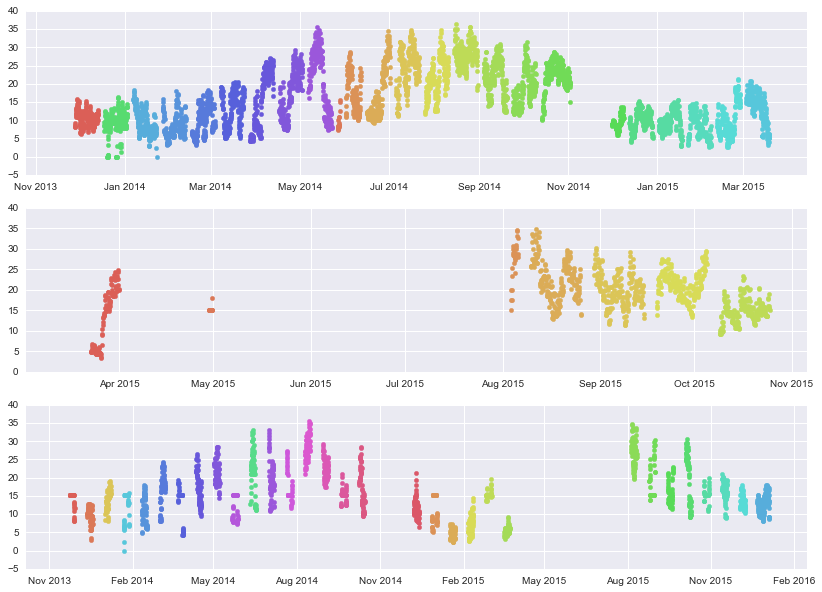

In [48]:
fig = plt.figure(figsize = (14,10))
i= 0
ax = plt.subplot(3,1,1)
for key,gp in batch_ite_train.df.groupby('group'):
    plt.scatter(gp.index,gp.temp,color = sns.color_palette('hls',len(d.df.groupby('group')))[i])
    i+=1
ax = plt.subplot(312)
i=0
for key,gp in batch_ite_val.df.groupby('group'):
    plt.scatter(gp.index,gp.temp,color = sns.color_palette('hls',len(d.df.groupby('group')))[i])
    i+=1
ax = plt.subplot(313)
i= 0
for key,gp in batch_ite_pred.df.groupby('group'):
    plt.scatter(gp.index,gp.temp,color = sns.color_palette('hls',len(d.df.groupby('group')))[i])
    i+=1